In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/train.csv')
df

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2
0,98481267304,1,0,M,B,1,0.000000,0.000000,0.00000,0.0,0.0,0.25,0.1,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
1,98481267304,2,0,M,B,1,0.137350,0.011550,0.09990,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.8,1.0,0.0,0.0,0.0,0.0,4.449287,101.369863
2,98481267304,3,0,M,B,1,0.158350,0.010425,0.02420,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.7,0.3,0.0,0.0,0.0,0.0,4.449287,101.369863
3,98481267304,4,0,M,B,1,0.444900,0.035850,0.23980,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,2.8,1.5,0.0,0.0,0.0,0.0,4.449287,101.369863
4,98481267304,5,0,M,B,1,0.000000,0.000000,0.00000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246832,98527316143,30,0,B,D,1,0.100000,0.015000,0.23375,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.2,0.2,0.0,0.0,0.0,0.0,4.086504,156.164384
1246833,98527316168,1,0,B,D,1,0.370533,0.048900,0.12320,0.0,0.0,0.50,0.1,0.50,0.0,0.0,0.0,0.5,0.1,0.0,0.0,0.0,0.0,3.959112,43.835616
1246834,98527316168,2,0,B,D,1,0.371137,0.040704,0.09790,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,2.5,0.2,0.0,0.0,0.0,0.0,3.959112,43.835616
1246835,98527316168,3,0,B,D,1,0.000000,0.000000,0.00000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.959112,43.835616


In [3]:
cat_features = df.select_dtypes(include = 'object').columns.values
cat_features

array(['CATEGORY_1', 'CATEGORY_2'], dtype=object)

In [4]:
df = pd.get_dummies(df, columns = cat_features, drop_first=False)
df.head()

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2,CATEGORY_1_A,CATEGORY_1_B,CATEGORY_1_C,CATEGORY_1_F,CATEGORY_1_G,CATEGORY_1_I,CATEGORY_1_J,CATEGORY_1_K,CATEGORY_1_L,CATEGORY_1_M,CATEGORY_2_A,CATEGORY_2_B,CATEGORY_2_C,CATEGORY_2_D,CATEGORY_2_E,CATEGORY_2_F,CATEGORY_2_G,CATEGORY_2_H,CATEGORY_2_I
0,98481267304,1,0,1,0.00000,0.000000,0.0000,0.0,0.0,0.25,0.1,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,98481267304,2,0,1,0.13735,0.011550,0.0999,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.8,1.0,0.0,0.0,0.0,0.0,4.449287,101.369863,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,98481267304,3,0,1,0.15835,0.010425,0.0242,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.7,0.3,0.0,0.0,0.0,0.0,4.449287,101.369863,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,98481267304,4,0,1,0.44490,0.035850,0.2398,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,2.8,1.5,0.0,0.0,0.0,0.0,4.449287,101.369863,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,98481267304,5,0,1,0.00000,0.000000,0.0000,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.449287,101.369863,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [6]:
dell = []
curr = 98481267304
curri = 0
for i in range(0,df.shape[0],1):
    if df.loc[i].at['UNIQUE_IDENTIFIER']==curr:
        dell.append(i)
        df.loc[curri] = (df.loc[curri] + df.loc[i])/2
    else:
        curri = i
        curr = df.loc[i].at['UNIQUE_IDENTIFIER']

In [7]:
df1 = df[~df.index.isin(dell)].copy()
df1.head()

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2,CATEGORY_1_A,CATEGORY_1_B,CATEGORY_1_C,CATEGORY_1_F,CATEGORY_1_G,CATEGORY_1_I,CATEGORY_1_J,CATEGORY_1_K,CATEGORY_1_L,CATEGORY_1_M,CATEGORY_2_A,CATEGORY_2_B,CATEGORY_2_C,CATEGORY_2_D,CATEGORY_2_E,CATEGORY_2_F,CATEGORY_2_G,CATEGORY_2_H,CATEGORY_2_I
7,9.848127e+10,18.000004,1.0,0.999512,37.791046,4.554220,32.089561,0.0,1.911313,7.770805,3.147697e-02,0.000038,0.156604,0.000787,0.001175,0.506484,0.133112,0.0,0.0,0.0,0.0,7.182779,115.068493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26,9.848127e+10,17.000008,0.0,1.000000,0.000034,0.000003,0.000019,0.0,0.000008,0.000002,7.629395e-07,0.000002,0.000000,0.000000,0.000004,0.025216,0.000100,0.0,0.0,0.0,0.0,3.977371,24.657534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
44,9.848127e+10,4.062500,0.0,1.000000,0.495000,0.077638,0.021250,0.0,0.150000,0.375000,1.875000e-02,0.062500,0.000000,0.000000,0.481250,0.643750,0.050000,0.0,0.0,0.0,0.0,3.988122,10.958904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49,9.848127e+10,1.000000,0.0,1.000000,0.500000,0.080000,0.000000,0.0,0.000000,0.500000,1.000000e-01,0.500000,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.0,0.0,0.0,4.128875,46.575342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50,9.848127e+10,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,1.000000e-01,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3.984064,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
df1 = df1.reset_index()
df1.head()

,index,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2,CATEGORY_1_A,CATEGORY_1_B,CATEGORY_1_C,CATEGORY_1_F,CATEGORY_1_G,CATEGORY_1_I,CATEGORY_1_J,CATEGORY_1_K,CATEGORY_1_L,CATEGORY_1_M,CATEGORY_2_A,CATEGORY_2_B,CATEGORY_2_C,CATEGORY_2_D,CATEGORY_2_E,CATEGORY_2_F,CATEGORY_2_G,CATEGORY_2_H,CATEGORY_2_I
0,7,9.848127e+10,18.000004,1.0,0.999512,37.791046,4.554220,32.089561,0.0,1.911313,7.770805,3.147697e-02,0.000038,0.156604,0.000787,0.001175,0.506484,0.133112,0.0,0.0,0.0,0.0,7.182779,115.068493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,26,9.848127e+10,17.000008,0.0,1.000000,0.000034,0.000003,0.000019,0.0,0.000008,0.000002,7.629395e-07,0.000002,0.000000,0.000000,0.000004,0.025216,0.000100,0.0,0.0,0.0,0.0,3.977371,24.657534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,44,9.848127e+10,4.062500,0.0,1.000000,0.495000,0.077638,0.021250,0.0,0.150000,0.375000,1.875000e-02,0.062500,0.000000,0.000000,0.481250,0.643750,0.050000,0.0,0.0,0.0,0.0,3.988122,10.958904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,49,9.848127e+10,1.000000,0.0,1.000000,0.500000,0.080000,0.000000,0.0,0.000000,0.500000,1.000000e-01,0.500000,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.0,0.0,0.0,4.128875,46.575342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,50,9.848127e+10,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,1.000000e-01,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3.984064,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
df1.drop('index', axis=1, inplace=True)
df1.head()

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2,CATEGORY_1_A,CATEGORY_1_B,CATEGORY_1_C,CATEGORY_1_F,CATEGORY_1_G,CATEGORY_1_I,CATEGORY_1_J,CATEGORY_1_K,CATEGORY_1_L,CATEGORY_1_M,CATEGORY_2_A,CATEGORY_2_B,CATEGORY_2_C,CATEGORY_2_D,CATEGORY_2_E,CATEGORY_2_F,CATEGORY_2_G,CATEGORY_2_H,CATEGORY_2_I
0,9.848127e+10,18.000004,1.0,0.999512,37.791046,4.554220,32.089561,0.0,1.911313,7.770805,3.147697e-02,0.000038,0.156604,0.000787,0.001175,0.506484,0.133112,0.0,0.0,0.0,0.0,7.182779,115.068493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9.848127e+10,17.000008,0.0,1.000000,0.000034,0.000003,0.000019,0.0,0.000008,0.000002,7.629395e-07,0.000002,0.000000,0.000000,0.000004,0.025216,0.000100,0.0,0.0,0.0,0.0,3.977371,24.657534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,9.848127e+10,4.062500,0.0,1.000000,0.495000,0.077638,0.021250,0.0,0.150000,0.375000,1.875000e-02,0.062500,0.000000,0.000000,0.481250,0.643750,0.050000,0.0,0.0,0.0,0.0,3.988122,10.958904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,9.848127e+10,1.000000,0.0,1.000000,0.500000,0.080000,0.000000,0.0,0.000000,0.500000,1.000000e-01,0.500000,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.0,0.0,0.0,4.128875,46.575342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9.848127e+10,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,1.000000e-01,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3.984064,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
df1['UNIQUE_IDENTIFIER'][0]

98481267698.0

In [11]:
df=df1

In [12]:
df.head()

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2,CATEGORY_1_A,CATEGORY_1_B,CATEGORY_1_C,CATEGORY_1_F,CATEGORY_1_G,CATEGORY_1_I,CATEGORY_1_J,CATEGORY_1_K,CATEGORY_1_L,CATEGORY_1_M,CATEGORY_2_A,CATEGORY_2_B,CATEGORY_2_C,CATEGORY_2_D,CATEGORY_2_E,CATEGORY_2_F,CATEGORY_2_G,CATEGORY_2_H,CATEGORY_2_I
0,9.848127e+10,18.000004,1.0,0.999512,37.791046,4.554220,32.089561,0.0,1.911313,7.770805,3.147697e-02,0.000038,0.156604,0.000787,0.001175,0.506484,0.133112,0.0,0.0,0.0,0.0,7.182779,115.068493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,9.848127e+10,17.000008,0.0,1.000000,0.000034,0.000003,0.000019,0.0,0.000008,0.000002,7.629395e-07,0.000002,0.000000,0.000000,0.000004,0.025216,0.000100,0.0,0.0,0.0,0.0,3.977371,24.657534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,9.848127e+10,4.062500,0.0,1.000000,0.495000,0.077638,0.021250,0.0,0.150000,0.375000,1.875000e-02,0.062500,0.000000,0.000000,0.481250,0.643750,0.050000,0.0,0.0,0.0,0.0,3.988122,10.958904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,9.848127e+10,1.000000,0.0,1.000000,0.500000,0.080000,0.000000,0.0,0.000000,0.500000,1.000000e-01,0.500000,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.0,0.0,0.0,4.128875,46.575342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9.848127e+10,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,1.000000e-01,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3.984064,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
df.drop('UNIQUE_IDENTIFIER', axis=1, inplace=True)

In [14]:
df.head()

,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,Y1,Y2,CATEGORY_1_A,CATEGORY_1_B,CATEGORY_1_C,CATEGORY_1_F,CATEGORY_1_G,CATEGORY_1_I,CATEGORY_1_J,CATEGORY_1_K,CATEGORY_1_L,CATEGORY_1_M,CATEGORY_2_A,CATEGORY_2_B,CATEGORY_2_C,CATEGORY_2_D,CATEGORY_2_E,CATEGORY_2_F,CATEGORY_2_G,CATEGORY_2_H,CATEGORY_2_I
0,18.000004,1.0,0.999512,37.791046,4.554220,32.089561,0.0,1.911313,7.770805,3.147697e-02,0.000038,0.156604,0.000787,0.001175,0.506484,0.133112,0.0,0.0,0.0,0.0,7.182779,115.068493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,17.000008,0.0,1.000000,0.000034,0.000003,0.000019,0.0,0.000008,0.000002,7.629395e-07,0.000002,0.000000,0.000000,0.000004,0.025216,0.000100,0.0,0.0,0.0,0.0,3.977371,24.657534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,4.062500,0.0,1.000000,0.495000,0.077638,0.021250,0.0,0.150000,0.375000,1.875000e-02,0.062500,0.000000,0.000000,0.481250,0.643750,0.050000,0.0,0.0,0.0,0.0,3.988122,10.958904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.000000,0.0,1.000000,0.500000,0.080000,0.000000,0.0,0.000000,0.500000,1.000000e-01,0.500000,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.0,0.0,0.0,4.128875,46.575342,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,1.000000e-01,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,3.984064,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


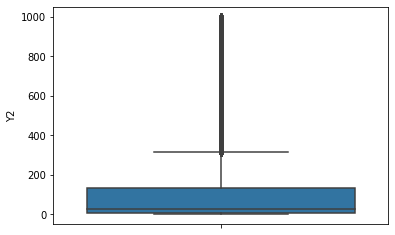

In [15]:
sns.boxplot(y='Y2',data=df)

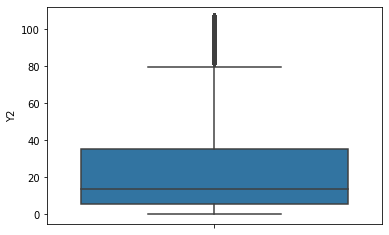

In [20]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]
    return df_final

df_outlier_removed = remove_outlier_IQR(df.Y2)

df_outlier_removed = pd.DataFrame(df_outlier_removed)

ind_diff = df.index.difference(df_outlier_removed.index)

for i in range(0, len(ind_diff),1):
    df_final=df.drop([ind_diff[i]])
    df=df_final
    
sns.boxplot(y='Y2',data=df)

In [52]:
df.shape

(69511, 41)

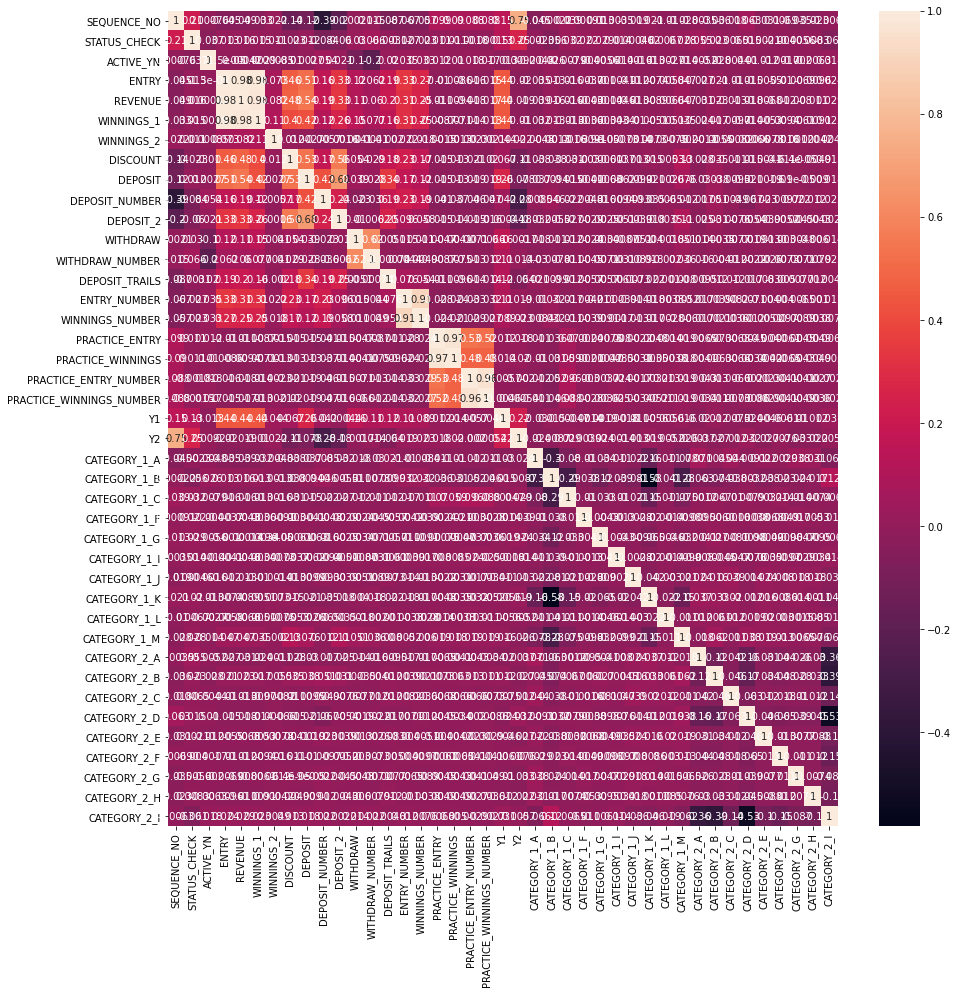

In [22]:
corr_matrix=df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix,annot=True)

In [42]:
Y1_features = []
for i, j in corr_matrix['Y1'].iteritems():
    if(abs(j)>0.05 and i!='Y1' and i!='Y2'):
        Y1_features.append(i)

Y1_features

['SEQUENCE_NO',
 'STATUS_CHECK',
 'ENTRY',
 'REVENUE',
 'WINNINGS_1',
 'DISCOUNT',
 'DEPOSIT',
 'WITHDRAW',
 'WITHDRAW_NUMBER',
 'DEPOSIT_TRAILS',
 'ENTRY_NUMBER',
 'WINNINGS_NUMBER']

In [43]:
Y2_features = []
for i, j in corr_matrix['Y2'].iteritems():
    if(abs(j)>0.05 and i!='Y1' and i!='Y2'):
        Y2_features.append(i)

Y2_features

['SEQUENCE_NO',
 'STATUS_CHECK',
 'DISCOUNT',
 'DEPOSIT',
 'DEPOSIT_NUMBER',
 'DEPOSIT_2',
 'DEPOSIT_TRAILS']

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [96]:
X_train = df.drop(['Y1','Y2'], axis=1)
X_test = df.drop(['Y1','Y2'], axis=1)

y_train = df[['Y1','Y2']]
y_test = df[['Y1','Y2']]

In [97]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = df.drop(['Y1','Y2'], axis=1).columns)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = df.drop(['Y1','Y2'], axis=1).columns)

In [98]:
model1 = AdaBoostRegressor()
model1.fit(X_train[Y1_features], y_train['Y1'])

mean_squared_error(y_test['Y1'], model1.predict(X_test[Y1_features]),squared=False), mean_squared_error(y_train['Y1'], model1.predict(X_train[Y1_features]),squared=False)

(1.472192542152991, 1.472192542152991)

In [99]:
model2 = AdaBoostRegressor()
model2.fit(X_train[Y2_features], y_train['Y2'])

mean_squared_error(y_test['Y2'], model2.predict(X_test[Y2_features]),squared=False), mean_squared_error(y_train['Y2'], model2.predict(X_train[Y2_features]),squared=False)

(19.186457063062868, 19.186457063062868)

In [100]:
model3 = LinearRegression()
model3.fit(X_train[Y1_features], y_train['Y1'])

mean_squared_error(y_test['Y1'], model3.predict(X_test[Y1_features]),squared=False), mean_squared_error(y_train['Y1'], model3.predict(X_train[Y1_features]),squared=False)

(0.635092033803431, 0.635092033803431)

In [101]:
model4 = LinearRegression()
model4.fit(X_train[Y2_features], y_train['Y2'])

mean_squared_error(y_test['Y2'], model4.predict(X_test[Y2_features]),squared=False), mean_squared_error(y_train['Y2'], model4.predict(X_train[Y2_features]),squared=False)

(17.22312411744899, 17.22312411744899)

In [102]:
model5 = RandomForestRegressor()
model5.fit(X_train[Y1_features], y_train['Y1'])

mean_squared_error(y_test['Y1'], model5.predict(X_test[Y1_features]),squared=False), mean_squared_error(y_train['Y1'], model5.predict(X_train[Y1_features]),squared=False)

(0.21115583044893227, 0.21115583044893227)

In [103]:
model6 = RandomForestRegressor()
model6.fit(X_train[Y2_features], y_train['Y2'])

mean_squared_error(y_test['Y2'], model6.predict(X_test[Y2_features]),squared=False), mean_squared_error(y_train['Y2'], model6.predict(X_train[Y2_features]),squared=False)

(9.531717468680275, 9.531717468680275)

In [104]:
model7 = DecisionTreeRegressor()
model7.fit(X_train[Y1_features], y_train['Y1'])

mean_squared_error(y_test['Y1'], model7.predict(X_test[Y1_features]),squared=False), mean_squared_error(y_train['Y1'], model7.predict(X_train[Y1_features]),squared=False)

(0.023316676547961945, 0.023316676547961945)

In [105]:
model8 = DecisionTreeRegressor()
model8.fit(X_train[Y2_features], y_train['Y2'])

mean_squared_error(y_test['Y2'], model8.predict(X_test[Y2_features]),squared=False), mean_squared_error(y_train['Y2'], model8.predict(X_train[Y2_features]),squared=False)

(7.8207872605476725, 7.8207872605476725)

In [106]:
# from sklearn.svm import SVR
# model9 = SVR(kernel = 'rbf')
# model9.fit(X_train[Y1_features], y_train['Y1'])

# mean_squared_error(y_test['Y1'], model9.predict(X_test[Y1_features]),squared=False), mean_squared_error(y_train['Y1'], model9.predict(X_train[Y1_features]),squared=False)

In [107]:
# model10 = SVR(kernel = 'rbf')
# model10.fit(X_train[Y2_features], y_train['Y2'])

# mean_squared_error(y_test['Y2'], model10.predict(X_test[Y2_features]),squared=False), mean_squared_error(y_train['Y2'], model10.predict(X_train[Y2_features]),squared=False)

In [108]:
Y1 = model1.predict(X_test[Y1_features]) + model3.predict(X_test[Y1_features]) + model5.predict(X_test[Y1_features]) + model7.predict(X_test[Y1_features])

In [109]:
Y2 = model2.predict(X_test[Y2_features]) + model4.predict(X_test[Y2_features]) + model6.predict(X_test[Y2_features]) + model8.predict(X_test[Y2_features])

In [110]:
mean_squared_error(y_test['Y2'], Y2/4, squared=False)

11.869729623451446

In [112]:
test = pd.read_csv('/content/drive/MyDrive/Datasets/test.csv')

In [113]:
test.head()

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,CATEGORY_1,CATEGORY_2,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER
0,98481269471,1,0,M,D,1,5.975,0.90500,0.4100,0.0,2.0,5.5,0.3,1.0,0.0,0.0,9.8,1.4,0.2,0.0,0.0,0.0,0.0
1,98481269471,2,0,M,D,0,0.000,0.00000,0.0000,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,98481270499,1,1,M,D,1,0.050,0.00750,0.0850,0.0,0.0,1.0,0.1,1.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0
3,98481270499,2,1,M,D,1,1.750,0.26250,1.0200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,1.2,0.0,0.0,0.0,0.0
4,98481272694,1,0,M,C,1,0.125,0.01875,0.0425,0.0,4.0,10.0,0.1,10.0,0.0,0.0,0.0,0.5,0.1,0.0,0.0,0.0,0.0


In [114]:
test.shape

(979059, 23)

In [116]:
test = pd.get_dummies(test, columns = cat_features, drop_first=False)
test.head()

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,CATEGORY_1_A,CATEGORY_1_B,CATEGORY_1_C,CATEGORY_1_D,CATEGORY_1_E,CATEGORY_1_F,CATEGORY_1_G,CATEGORY_1_I,CATEGORY_1_J,CATEGORY_1_K,CATEGORY_1_L,CATEGORY_1_M,CATEGORY_2_A,CATEGORY_2_B,CATEGORY_2_C,CATEGORY_2_D,CATEGORY_2_E,CATEGORY_2_F,CATEGORY_2_G,CATEGORY_2_H,CATEGORY_2_I
0,98481269471,1,0,1,5.975,0.90500,0.4100,0.0,2.0,5.5,0.3,1.0,0.0,0.0,9.8,1.4,0.2,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,98481269471,2,0,0,0.000,0.00000,0.0000,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,98481270499,1,1,1,0.050,0.00750,0.0850,0.0,0.0,1.0,0.1,1.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,98481270499,2,1,1,1.750,0.26250,1.0200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,1.2,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,98481272694,1,0,1,0.125,0.01875,0.0425,0.0,4.0,10.0,0.1,10.0,0.0,0.0,0.0,0.5,0.1,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [117]:
dell = []
curr = 98481269471
curri = 0
for i in range(1,test.shape[0],1):
    if test.loc[i].at['UNIQUE_IDENTIFIER']==curr:
        dell.append(i)
        test.loc[curri] = (test.loc[curri] + test.loc[i])/2
    else:
        curri = i
        curr = test.loc[i].at['UNIQUE_IDENTIFIER']

In [118]:
test1 = test[~test.index.isin(dell)].copy()

In [119]:
test1

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,CATEGORY_1_A,CATEGORY_1_B,CATEGORY_1_C,CATEGORY_1_D,CATEGORY_1_E,CATEGORY_1_F,CATEGORY_1_G,CATEGORY_1_I,CATEGORY_1_J,CATEGORY_1_K,CATEGORY_1_L,CATEGORY_1_M,CATEGORY_2_A,CATEGORY_2_B,CATEGORY_2_C,CATEGORY_2_D,CATEGORY_2_E,CATEGORY_2_F,CATEGORY_2_G,CATEGORY_2_H,CATEGORY_2_I
0,9.848127e+10,1.500000,0.0,0.500000,2.987500e+00,4.525000e-01,2.050000e-01,0.000000e+00,1.200000,2.750000e+00,1.500000e-01,5.000000e-01,0.000000e+00,0.000000e+00,4.900000e+00,0.700000,1.000000e-01,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,9.848127e+10,1.500000,1.0,1.000000,9.000000e-01,1.350000e-01,5.525000e-01,0.000000e+00,0.000000,5.000000e-01,5.000000e-02,5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.800000,6.500000e-01,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9.848127e+10,18.000004,0.0,1.000000,4.768372e-07,7.152557e-08,1.621246e-07,0.000000e+00,0.000015,3.814697e-05,3.814697e-07,3.814697e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000002,3.814697e-07,0.694794,0.201308,0.397383,0.052216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23,9.848127e+10,26.000000,0.0,0.999969,4.420165e-01,6.643889e-02,6.645322e-02,6.644836e-02,0.055401,4.138375e-02,1.977731e-03,7.450581e-09,0.000000e+00,0.000000e+00,7.812884e-03,0.295248,9.016468e-03,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,9.848128e+10,4.062500,0.0,0.500000,7.112292e-01,7.013777e-02,1.432438e-01,0.000000e+00,0.437500,3.750000e-01,4.375000e-02,6.250000e-02,0.000000e+00,0.000000e+00,0.000000e+00,5.100000,1.893750e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978963,9.853720e+10,29.000000,1.0,0.999999,4.179816e-01,5.667286e-02,2.219015e-01,4.883920e-03,0.076401,1.256123e-01,2.512246e-02,9.313226e-10,2.384186e-08,5.960464e-09,7.629395e-07,3.394157,6.245915e-01,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
978993,9.853720e+10,1.000000,0.0,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.500000e-01,1.000000e-01,2.500000e-01,0.000000e+00,0.000000e+00,5.000000e-02,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
978994,9.853720e+10,10.000977,0.0,0.500000,1.279736e-01,1.932550e-02,4.360352e-02,1.687500e-02,0.075156,6.323242e-02,1.269531e-02,2.441406e-04,0.000000e+00,0.000000e+00,7.031250e-03,0.266992,6.269531e-02,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
979005,9.853721e+10,23.000000,1.0,0.995972,4.098415e-06,1.022259e-06,4.053116e-08,0.000000e+00,0.000000,2.980232e-08,1.192093e-08,2.980232e-08,0.000000e+00,0.000000e+00,2.441406e-05,0.020772,9.536743e-08,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [120]:
test2 = test1.reset_index().drop('index', axis=1)
test2

,UNIQUE_IDENTIFIER,SEQUENCE_NO,STATUS_CHECK,ACTIVE_YN,ENTRY,REVENUE,WINNINGS_1,WINNINGS_2,DISCOUNT,DEPOSIT,DEPOSIT_NUMBER,DEPOSIT_2,WITHDRAW,WITHDRAW_NUMBER,DEPOSIT_TRAILS,ENTRY_NUMBER,WINNINGS_NUMBER,PRACTICE_ENTRY,PRACTICE_WINNINGS,PRACTICE_ENTRY_NUMBER,PRACTICE_WINNINGS_NUMBER,CATEGORY_1_A,CATEGORY_1_B,CATEGORY_1_C,CATEGORY_1_D,CATEGORY_1_E,CATEGORY_1_F,CATEGORY_1_G,CATEGORY_1_I,CATEGORY_1_J,CATEGORY_1_K,CATEGORY_1_L,CATEGORY_1_M,CATEGORY_2_A,CATEGORY_2_B,CATEGORY_2_C,CATEGORY_2_D,CATEGORY_2_E,CATEGORY_2_F,CATEGORY_2_G,CATEGORY_2_H,CATEGORY_2_I
0,9.848127e+10,1.500000,0.0,0.500000,2.987500e+00,4.525000e-01,2.050000e-01,0.000000e+00,1.200000,2.750000e+00,1.500000e-01,5.000000e-01,0.000000e+00,0.000000e+00,4.900000e+00,0.700000,1.000000e-01,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,9.848127e+10,1.500000,1.0,1.000000,9.000000e-01,1.350000e-01,5.525000e-01,0.000000e+00,0.000000,5.000000e-01,5.000000e-02,5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.800000,6.500000e-01,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,9.848127e+10,18.000004,0.0,1.000000,4.768372e-07,7.152557e-08,1.621246e-07,0.000000e+00,0.000015,3.814697e-05,3.814697e-07,3.814697e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000002,3.814697e-07,0.694794,0.201308,0.397383,0.052216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,9.848127e+10,26.000000,0.0,0.999969,4.420165e-01,6.643889e-02,6.645322e-02,6.644836e-02,0.055401,4.138375e-02,1.977731e-03,7.450581e-09,0.000000e+00,0.000000e+00,7.812884e-03,0.295248,9.016468e-03,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9.848128e+10,4.062500,0.0,0.500000,7.112292e-01,7.013777e-02,1.432438e-01,0.000000e+00,0.437500,3.750000e-01,4.375000e-02,6.250000e-02,0.000000e+00,0.000000e+00,0.000000e+00,5.100000,1.893750e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65237,9.853720e+10,29.000000,1.0,0.999999,4.179816e-01,5.667286e-02,2.219015e-01,4.883920e-03,0.076401,1.256123e-01,2.512246e-02,9.313226e-10,2.384186e-08,5.960464e-09,7.629395e-07,3.394157,6.245915e-01,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
65238,9.853720e+10,1.000000,0.0,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.500000e-01,1.000000e-01,2.500000e-01,0.000000e+00,0.000000e+00,5.000000e-02,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
65239,9.853720e+10,10.000977,0.0,0.500000,1.279736e-01,1.932550e-02,4.360352e-02,1.687500e-02,0.075156,6.323242e-02,1.269531e-02,2.441406e-04,0.000000e+00,0.000000e+00,7.031250e-03,0.266992,6.269531e-02,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
65240,9.853721e+10,23.000000,1.0,0.995972,4.098415e-06,1.022259e-06,4.053116e-08,0.000000e+00,0.000000,2.980232e-08,1.192093e-08,2.980232e-08,0.000000e+00,0.000000e+00,2.441406e-05,0.020772,9.536743e-08,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
sample = pd.read_csv('/content/drive/MyDrive/Datasets/sample_submission_random.csv')

In [125]:
Y1 = model1.predict(test2[Y1_features]) + model3.predict(test2[Y1_features]) + model5.predict(test2[Y1_features]) + model7.predict(test2[Y1_features])
Y2 = model2.predict(test2[Y2_features]) + model4.predict(test2[Y2_features]) + model6.predict(test2[Y2_features]) + model8.predict(test2[Y2_features])

details = {
    'UNIQUE_IDENTIFIER' : sample['UNIQUE_IDENTIFIER'],
    'Y1' : Y1/4,
    'Y2' : Y2/4,
}
  
subs = pd.DataFrame(details)
subs=subs.set_index('UNIQUE_IDENTIFIER')
subs.to_csv('sub2.csv')